# How are in-demand skill trending for Data Analysts in the United States? 

###  Methodology: 

1. Aggregate skill counts monthly 
2. Re-analyze based on percentage of total jobs 
3. Plot the monthly skill demand 

In [12]:
# mporting libraries/Loading data/minor data cleanup 
import ast
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv(r'C:\Users\nickg\Desktop\Python\Data\data_jobs.csv')
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [13]:
# filter out our data frame to only show Job Postings  for Data Analysts within the United States and make a copy
df_US = df[(df['job_country']=='United States')  & (df['job_title']=='Data Analyst')].copy()
df_US #viewing

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,NaN,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,NaN,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,NaN,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,NaN,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,NaN,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e..."
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,NaN,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'..."
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."


In [14]:
# create a job posted month number column for later aggregation 
df_US['job_posted_month_number'] = df_US['job_posted_date'].dt.month # extracting the month number from our date time object
df_US['job_posted_month_number'] # viewing

36        11
155        1
332        4
385        2
476        1
          ..
784841     1
784929     5
785078     3
785539     1
785685     7
Name: job_posted_month_number, Length: 14086, dtype: int32

In [15]:
# using the explode function on the skills we want to analyze
# this grabs each value from the ['job_skills'] column and separates it into its own row value
df_us_explode = df_US.explode('job_skills')
df_us_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_number
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,python,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,unix,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,NaN,NaN,NaN,Citi,excel,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,databricks,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,tableau,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,NaN,NaN,NaN,Guidehouse,excel,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


In [16]:
# creating a pivot table with the skills we exploded and the job posted month as the index 
df_US_Pivot = df_us_explode.pivot_table(index='job_posted_month_number', columns='job_skills', aggfunc='size', fill_value=0) #getting an aggregated count and filling NaN values with 0
df_US_Pivot.loc['Total'] = df_US_Pivot.sum() #creating a total sum column at the bottom of the pivot 
df_US_Pivot = df_US_Pivot[df_US_Pivot.loc['Total'].sort_values(ascending=False).index] #sorting by index values of 'Total 

In [17]:
# now that the pivot table is sorted we can drop the total 'Index' before plotting 
df_US_Pivot = df_US_Pivot.drop('Total')
df_US_Pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [18]:
# We need to convert our pivot counts into percentages. Grab the total job postings by month and store them into a Total Variable for dividing. 
DA_Total = df_US.groupby('job_posted_month_number').size()

In [19]:
# Creating our updated data frame by dividing the count of each skill in each month by the total job postings for that month. 
df_US_Percent = df_US_Pivot.div(DA_Total/100, axis=0) 

In [20]:
# Converting month number index into month name for better visualization when plotting 
df_US_Percent = df_US_Percent.reset_index()
df_US_Percent['job_posted_month'] = df_US_Percent['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')) #applying conversion from number to string in each index value, and renaming to job_posted_month
df_US_Percent = df_US_Percent.set_index('job_posted_month') #setting the index to the new month (string) column
df_US_Percent = df_US_Percent.drop(columns='job_posted_month_number') # drop the old index that is now a column 

df_US_Percent # viewing changes



job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


In [21]:
# We only want the top 5 skills in plotting, so we can filter on that. 
df_plot = df_US_Percent.iloc[:, :5] # all rows and columns 1-5

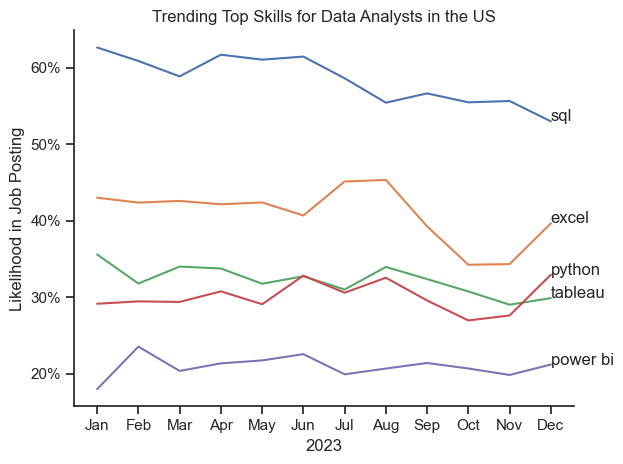

In [22]:
# Plotting 
sns.lineplot(data=df_plot, dashes=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

ax= plt.gca() #getting the current axis to format the Y axis
from matplotlib.ticker import PercentFormatter # change yaxis to percent using matplotlib.ticker
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

#creating labels for each line within the range of the 5 values 
# plt.text(X position, y value, string label ). Notice each of our lines end at the 12th-1 index value of 11 or "Dec". We want our labels to start here. 
# to specify the y value we want it also to locate the last row of each index value (last row for sql, python...etc)
# lastly we want our label to be the string of the column names in the range
for i in range(5): 
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])
plt.tight_layout()
plt.show()